In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
gps_data = pd.read_csv('data/PX4/07_51_52_vehicle_gps_position_0.csv')
attitude_data = pd.read_csv('data/PX4/07_51_52_vehicle_attitude_0.csv')

In [3]:
# Convert timestamps to datetime objects
gps_data['timestamp'] = pd.to_datetime(gps_data['timestamp'], unit='us')
attitude_data['timestamp'] = pd.to_datetime(attitude_data['timestamp'], unit='us')

# Merge the two dataframes based on the nearest timestamp
data = pd.merge_asof(attitude_data, gps_data, on='timestamp', direction='nearest')

In [4]:
data['flight_data_time']=pd.to_datetime(data['time_utc_usec'], unit = 'us', origin ='unix')

In [5]:
data['flight_data_time']

0       2019-10-21 07:51:52.200101
1       2019-10-21 07:51:52.200101
2       2019-10-21 07:51:52.200101
3       2019-10-21 07:51:52.400101
4       2019-10-21 07:51:52.400101
                   ...            
21924   2019-10-21 08:03:28.000000
21925   2019-10-21 08:03:28.199999
21926   2019-10-21 08:03:28.199999
21927   2019-10-21 08:03:28.199999
21928   2019-10-21 08:03:28.199999
Name: flight_data_time, Length: 21929, dtype: datetime64[ns]

In [6]:
data.set_index('flight_data_time', inplace=True)

In [7]:
# Calculate rolling standard deviation for roll, pitch, and yaw
window_size = 10
data['roll_std'] = data['rollspeed'].rolling(window=window_size).std()
data['pitch_std'] = data['pitchspeed'].rolling(window=window_size).std()
data['yaw_std'] = data['yawspeed'].rolling(window=window_size).std()

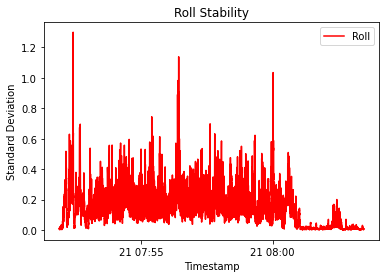

In [8]:
# Plot rolling standard deviation for roll
fig, ax = plt.subplots()

ax.plot(data.index, data['roll_std'], label='Roll', color='r')

ax.set_xlabel('Timestamp')
ax.set_ylabel('Standard Deviation')
ax.set_title('Roll Stability')

ax.legend()
plt.show()

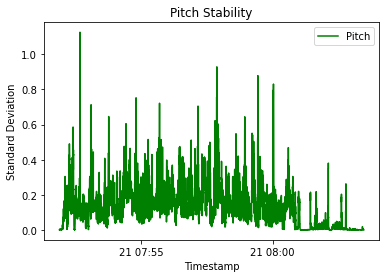

In [9]:
# Plot rolling standard deviation for pitch
fig, ax = plt.subplots()

ax.plot(data.index, data['pitch_std'], label='Pitch', color='g')

ax.set_xlabel('Timestamp')
ax.set_ylabel('Standard Deviation')
ax.set_title('Pitch Stability')

ax.legend()
plt.show()


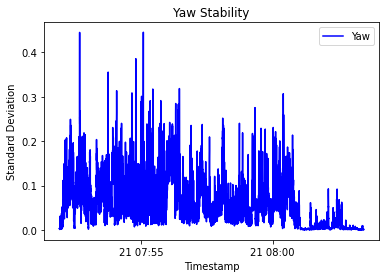

In [10]:
# Plot rolling standard deviation for yaw
fig, ax = plt.subplots()

ax.plot(data.index, data['yaw_std'], label='Yaw', color='b')

ax.set_xlabel('Timestamp')
ax.set_ylabel('Standard Deviation')
ax.set_title('Yaw Stability')

ax.legend()
plt.show()